## k-Means 2D passo a passo

In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
from matplotlib import pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Base de dados :

In [2]:
data_1 = np.random.randn(200, 2) + np.array([1,1])
data_2 = np.random.randn(200,2) + np.array([5,5])
data_3 = np.random.randn(200,2) + np.array([8,1])
data = np.concatenate((data_1, data_2, data_3), axis = 0)
data.shape

(600, 2)

## Visualização da base de dados :

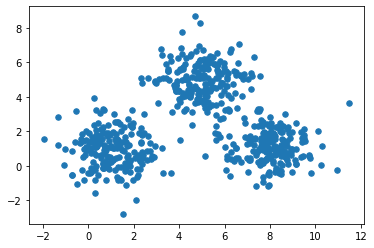

In [3]:
plt.scatter(data[:,0], data[:,1], s=30)

### Machine Learning "From scratch"

Modelo Matemático:

$x_1, x_2 \rightarrow{}$ features

$x_{1}^{(C_{k})}, x_{2}^{(C_{k})} \rightarrow{}$ coordenadas do centróide

$d_{C_{k}}^{(i)} = \sqrt{(x_{1}^{(i)}-x_{1}^{(C_{k})})^{2} + (x_{2}^{(i)}-x_{2}^{(C_{k})})^{2}} \rightarrow{}$ cálculo da distância entre a linha da base e os centróides

$C_{k} = \min_{C_{k}}[d_{C_{1}}^{(i)}, d_{C_{2}}^{(i)}, ..., d_{C_{k}}^{(i)}] \rightarrow{}$ a linha da base é alocada no cluster com menor $d$

$x_{1}^{(C_{k})}=\frac{1}{N}\sum_{i=x\in C_{k}}^{N}x_{1} \rightarrow{}$ cálculo da coordeanda média $x_{1}$ do centróide do cluster

$x_{2}^{(C_{k})}=\frac{1}{N}\sum_{i=x\in C_{k}}^{N}x_{2} \rightarrow{}$ cálculo da coordeanda média $x_{2}$ do centróide do cluster


### Modelo computacional:

- escolher o número $k$ de clusters
- escolher parâmetros inciais $x_{1}^{(C_{k})}$ e $x_{2}^{(C_{k})}$
- calcular as distâncias $d_{C_{k}}^{(i)}$ para cada linha da base
- alocar cada linha da base no centróide $C_{k}$ correspondente
- atualizar os parâmetros $x_{1}^{(C_{k})}$ e $x_{2}^{(C_{k})}$ a cada iteração, fazendo:

    - $x_{1}^{(C_{k})}  \leftarrow{} \frac{1}{N}\sum_{i=x\in C_{k}}^{N}x_{1}$
    - $x_{2}^{(C_{k})}  \leftarrow{} \frac{1}{N}\sum_{i=x\in C_{k}}^{N}x_{2}$

## Escolha do número de clusters :

In [4]:
k = 3
n = data.shape[0]
c = data.shape[1]

## Inicialização dos centróides :

In [5]:
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean
print(centers)

[[ 7.8897594   2.03317854]
 [ 3.06264888  4.66978368]
 [ 6.32860374 -3.37887796]]


## Visualização da inicialização dos centróides :

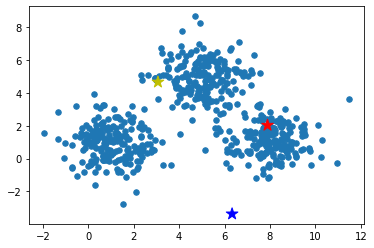

In [6]:
plt.scatter(data[:,0], data[:,1], s=30)
plt.scatter(centers[:,0], centers[:,1], marker='*', c=['r', 'y', 'b'], s=150)

## Inicialização das variáveis do algoritmo k-Means :

In [7]:
centers_old = np.zeros(centers.shape)
centers_new = deepcopy(centers)
clusters = np.zeros(n)
distances = np.zeros((n,k))
distortions = np.zeros(k)
distortion_total = 0
error = np.linalg.norm(centers_new - centers_old)
print('Centróide atual:', centers_old)
print('')
print('Centróide atualizado:', centers_new)
print('')
print('Diferença após atualização dos centróides :', error)
print('')
print('Métrica para determinação do número de clusters:', distortion_total)

Centróide atual: [[0. 0.]
 [0. 0.]
 [0. 0.]]

Centróide atualizado: [[ 7.8897594   2.03317854]
 [ 3.06264888  4.66978368]
 [ 6.32860374 -3.37887796]]

Diferença após atualização dos centróides : 12.208065273460278

Métrica para determinação do número de clusters: 0


## Algortimo k-Means passo a passo :

### Cálculo das distâncias entre os pontos da base e os centróides e escolha do cluster :

Distâncias dos centróides ao primeiro ponto da base: [7.58244278 4.44027236 7.49132685]

Menor distância entre o primeiro ponto da base e os centróides: 1


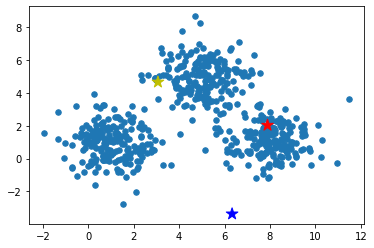

In [8]:
#1a iteração

for i in range(k):
    distances[:,i] = np.linalg.norm(data - centers_new[i], axis=1)

clusters = np.argmin(distances, axis = 1)

print('Distâncias dos centróides ao primeiro ponto da base:', distances[0])
print('')
print('Menor distância entre o primeiro ponto da base e os centróides:', clusters[0])

plt.scatter(data[:,0], data[:,1], s=30)
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c=['r', 'y', 'b'], s=150)

### Atualização dos centróides :

In [9]:
#1a iteração

for i in range(k):
    centers_new[i] = np.mean(data[clusters == i], axis=0)
    distortions[i] = np.linalg.norm(data[clusters == i] - centers_new[i], axis=1).sum()
    
error = np.linalg.norm(centers_new - centers_old)    
distortion_total = distortions.sum()
print('Diferença após atualização dos centróides :', error)
print('')
print('Métrica para determinação do número de clusters:', distortion_total)

Diferença após atualização dos centróides : 9.688027907433417

Métrica para determinação do número de clusters: 1420.33894394022


### Cálculo das distâncias entre os pontos da base e os centróides e escolha do cluster :

Distâncias dos centróides ao primeiro ponto da base: [7.47610769 3.05794808 3.85216002]

Menor distância entre o primeiro ponto da base e os centróides: 1


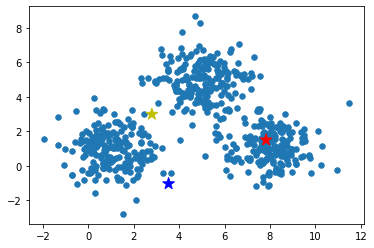

In [10]:
#2a iteração

for i in range(k):
    distances[:,i] = np.linalg.norm(data - centers_new[i], axis=1)

clusters = np.argmin(distances, axis = 1)

print('Distâncias dos centróides ao primeiro ponto da base:', distances[0])
print('')
print('Menor distância entre o primeiro ponto da base e os centróides:', clusters[0])

plt.scatter(data[:,0], data[:,1], s=30)
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c=['r', 'y', 'b'], s=150)

### Atualização dos centróides :

In [11]:
#2a iteração

for i in range(k):
    centers_new[i] = np.mean(data[clusters == i], axis=0)
    distortions[i] = np.linalg.norm(data[clusters == i] - centers_new[i], axis=1).sum()
    
error = np.linalg.norm(centers_new - centers_old)    
distortion_total = distortions.sum()
print('Diferença após atualização dos centróides :', error)
print('')
print('Métrica para determinação do número de clusters:', distortion_total)

Diferença após atualização dos centróides : 9.35852409571191

Métrica para determinação do número de clusters: 1218.856167600995


## Algortimo k-Means :

In [12]:
while error != 0:
    
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers_new[i], axis=1)
    
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
        distortions[i] = np.linalg.norm(data[clusters == i] - centers_new[i], axis=1).sum()
    
    error = np.linalg.norm(centers_new - centers_old)
    
    distortion_total = distortions.sum()

print(centers_old)    
print('')
print(centers_new)
print('')
print(distortions)
print('')
print(distortion_total)
print('')
print(error)

[[7.98266726 1.10278074]
 [4.99128871 4.97687249]
 [1.01802248 0.93685721]]

[[7.98266726 1.10278074]
 [4.99128871 4.97687249]
 [1.01802248 0.93685721]]

[237.95211564 260.59891995 260.76500271]

759.3160382995168

0.0


## Visualização dos centróides finais :

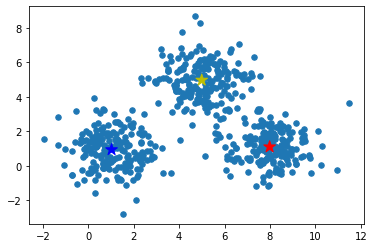

In [13]:
plt.scatter(data[:,0], data[:,1], s=30)
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c=['r', 'y', 'b'], s=150)

## Visualização dos clusters finais :

<AxesSubplot:xlabel='x_axis', ylabel='y_axis'>

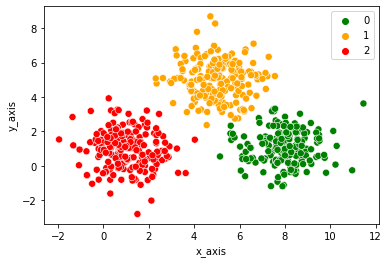

In [14]:
data_cluster = pd.DataFrame(data)
data_cluster[2] = clusters
data_cluster.rename({0:'x_axis', 1:'y_axis', 2:'cluster'}, axis = 1, inplace = True)
sns.scatterplot(data = data_cluster, x = 'x_axis', y = 'y_axis', hue = data_cluster.cluster.tolist(), s=50,  palette=['green','orange','red'])

## Visualização da função 'Elbow' :

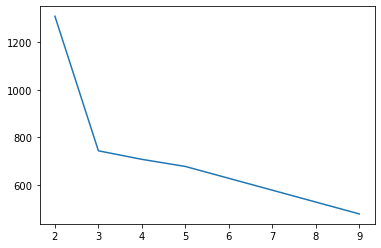

In [15]:
plt.plot([2,3,4,5,9],[1310,743,707,677,477])